# Image augmentation tutorial

## Actions

- [crop](#Crop)
- [flip](#Flip)
- [rotate](#Rotate)
- [shift](#Shift)
- [resize](#Resize)
- [scale](#Scale)
- [pad](#Pad)
- [affine_transform](#Affine_transform)
- [invert](#Invert)
- [threshold](#Threshold)
- [multiply](#Multiply)
- [add](#Add)
- [salt](#Salt)
- [gaussian_filter](#Gaussian_filter)
- [put_on_background](#Put_on_background)

In each section you will see examples of transformations that are performed by the choosen action. The section itself consists of several cells. Every cell has only one function invoking: ``plot_examples``. The first two arguments are not important, others are responsible for different parameters passed to an action. Action itself is perfomed with every item in the parameter's list. For example:

``
plot_examples(title = 'crop',
              action = lambda batch, **params: batch.crop(**params),
              origin = ['center', 'top_left', (14, 0), (0, 14)],
              shape = [(14, 14), (18, 18), (14, 24), (24, 14)])
``

in the [crop](#Crop) section will first invoke ``crop(origin='center', shape=(14,14)``, then  ``crop(origin='top_left', shape=(18,18)`` and etc. For every invocation two images are drawn in a line: before and after an action.


## Pipeline example

This section provides information about using actions in a pipeline

- [Pipeline example](#Pipeline-example)





# Actions

In [1]:
%matplotlib inline

import sys
import os
import numpy as np
from matplotlib import pyplot as plt

sys.path.append(os.path.abspath('../..'))

import dataset as ds
from dataset.opensets import CIFAR10, MNIST
from dataset import B, V, C, F, R, P
from dataset.models.tf import ResNet18
from dataset import Pipeline
from dataset import ImagesBatch


def show_img(axis, image, title):
    axis.imshow(image)
    axis.set_title(title, fontsize=12)
    axis.tick_params(bottom='off', labelbottom='off', left='off', labelleft='off')

def plot_examples(title, action, title_action=True, **params):
    num_plots = 2 * len(list(params.values())[0])
    f, a = plt.subplots(1, num_plots, figsize=(16, 3))
    for i in range(num_plots // 2):
        batch = cifar_ds.train.next_batch(2)
        current_params = {k : v[i] for k, v in params.items()}
        show_img(a[i*2], batch.images[0].squeeze(), 'original')
        action(batch, **current_params)
        if title_action:
            title_action = '\n'.join((str(k)+'=' + str(v if not callable(v) else 'sampler') for k, v in current_params.items()))        
        else:
            title_action = ''
        show_img(a[i*2+1], batch.images[0].squeeze(), title_action)
    plt.suptitle(title, fontsize=18)

PATH_TO_CIFAR = '/home/grisha/work/az_training/gregory_ivanov/task_02/'   

cifar_ds = CIFAR10(batch_class=ImagesBatch, path=PATH_TO_CIFAR)

/home/grisha/anaconda3/envs/tf/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Extracting...
Extracted


# Crop

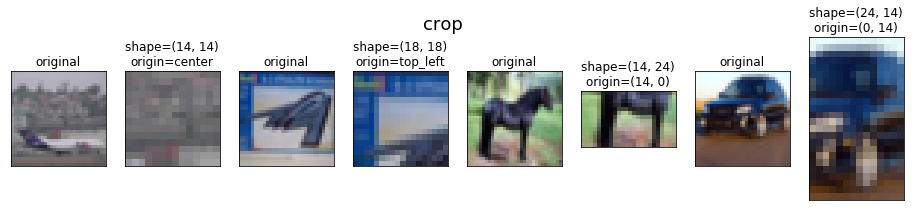

In [3]:
plot_examples(title = 'crop',
              action = lambda batch, **params: batch.crop(**params),
              origin = ['center', 'top_left', (14, 0), (0, 14)],
              shape = [(14, 14), (18, 18), (14, 24), (24, 14)])

##  Crop at random origin

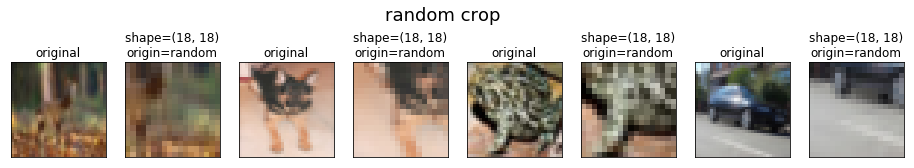

In [3]:
plot_examples(title = 'random crop',
              action = lambda batch, **params: batch.crop(**params),
              shape = [(18, 18)]*4,
              origin = ['random']*4)

# Flip

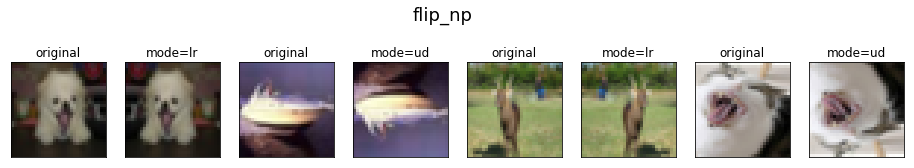

In [4]:
plot_examples(title = 'flip_np',
              action = lambda batch, **params: batch.flip(**params),
              mode = ['lr', 'ud', 'lr', 'ud'])

# Rotate

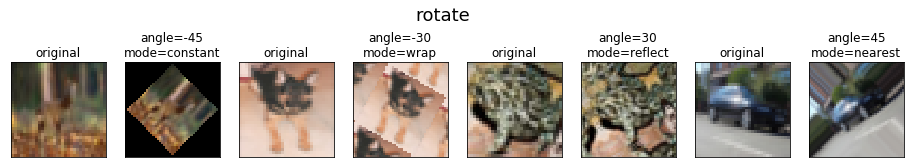

In [3]:
plot_examples(title = 'rotate',
              action = lambda batch, **params: batch.rotate(**params),
              angle = [-45, -30, 30, 45],
              mode = ['constant', 'wrap', 'reflect', 'nearest'])

# Shift

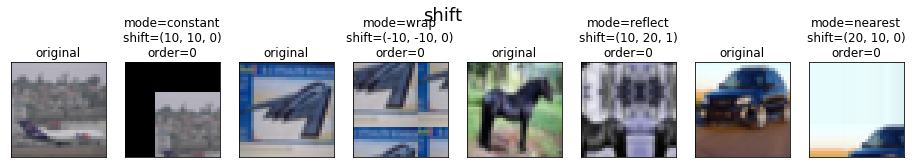

In [2]:
plot_examples(title = 'shift',
              action = lambda batch, **params: batch.shift(**params),
              shift = [(10, 10, 0), (-10, -10, 0), (10, 20, 1), (20, 10, 0)],
              order=[0]*4,
              mode = ['constant', 'wrap', 'reflect', 'nearest'])

# Resize

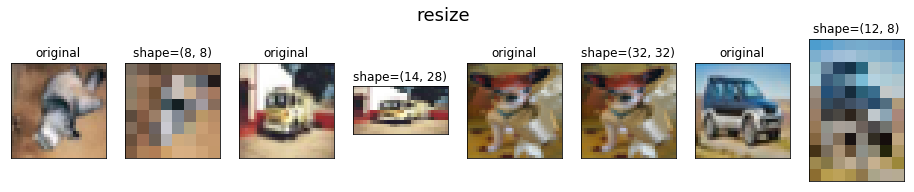

In [31]:
plot_examples(title = 'resize',
              action = lambda batch, **params: batch.resize(**params),
              shape = [(8, 8), (14, 28), (32, 32), (12, 8)])

# Scale

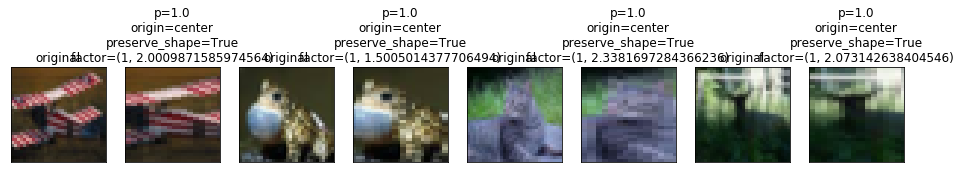

In [32]:
factor_sampler = lambda: (1, 1+2*np.random.beta(5,5))

plot_examples(title = '',
              action = lambda batch, **params: batch.scale(**params),
              p = [1.]*4,
              factor=[factor_sampler() for i in range(4)],
              preserve_shape=[True]*4,
              origin=['center']*4)

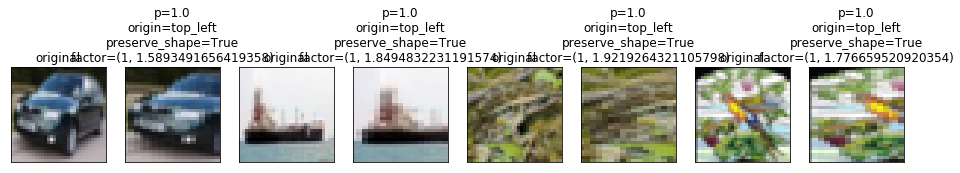

In [33]:
plot_examples(title = '',
              action = lambda batch, **params: batch.scale(**params),
              p = [1.]*4,
              factor=[factor_sampler() for i in range(4)],
              preserve_shape=[True]*4,
              origin=['top_left']*4)

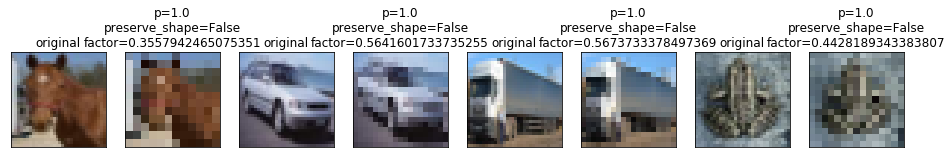

In [34]:
factor_sampler =  lambda: 0.3 + 0.4 * np.random.beta(5,5)

plot_examples(title = '',
              action = lambda batch, **params: batch.scale(**params),
              p = [1.]*4,
              factor=[factor_sampler() for i in range(4)],
              preserve_shape=[False]*4)

/home/grisha/work/dataset/dataset/batch_image.py:475: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  'top_left' if origin != 'center' else 'center',


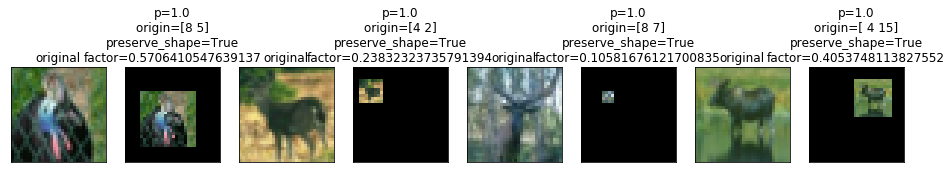

In [35]:
factor_sampler =  lambda: 0.1 + 0.7 * np.random.beta(2,2)
origin_sampler = lambda: (20 * np.random.beta(2,2,2)).astype(np.int)

plot_examples(title = '',
              action = lambda batch, **params: batch.scale(**params),
              p = [1.]*4,
              factor=[factor_sampler() for i in range(4)],
              preserve_shape=[True]*4,
              origin=[origin_sampler() for i in range(4)])

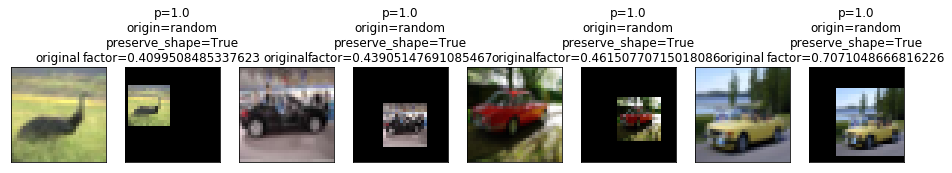

In [36]:
factor_sampler =  lambda: 0.1 + 0.7 * np.random.beta(2,2)

plot_examples(title = '',
              action = lambda batch, **params: batch.scale(**params),
              p = [1.]*4,
              factor=[factor_sampler() for i in range(4)],
              preserve_shape=[True]*4,
              origin=['random']*4)

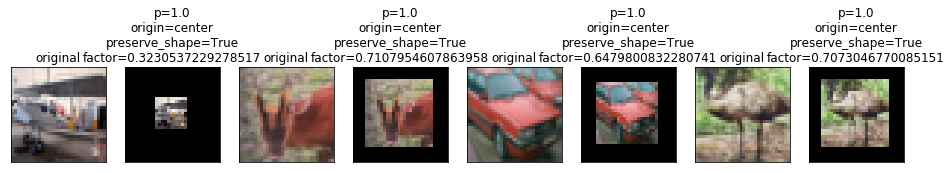

In [37]:
plot_examples(title = '',
              action = lambda batch, **params: batch.scale(**params),
              p = [1.]*4,
              factor=[factor_sampler() for i in range(4)],
              preserve_shape=[True]*4,
              origin=['center']*4)

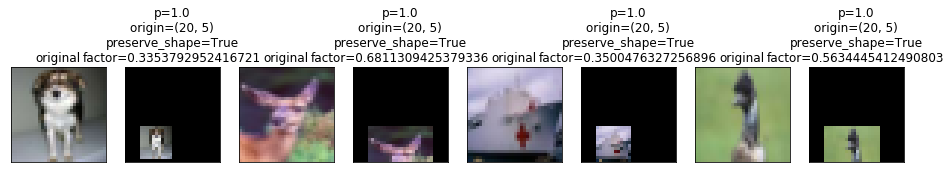

In [38]:
plot_examples(title = '',
              action = lambda batch, **params: batch.scale(**params),
              p = [1.]*4,
              factor=[factor_sampler() for i in range(4)],
              preserve_shape=[True]*4,
              origin=[(20,5)]*4)

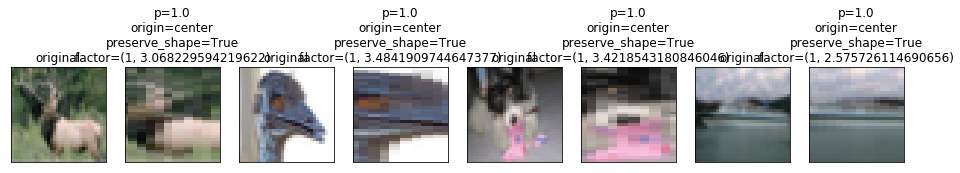

In [39]:
factor_sampler = lambda: (1, 2+2*np.random.beta(5,5))
plot_examples(title = '',
              action = lambda batch, **params: batch.scale(**params),
              p = [1.]*4,
              factor=[factor_sampler() for i in range(4)],
              preserve_shape=[True]*4,
              origin=['center']*4)

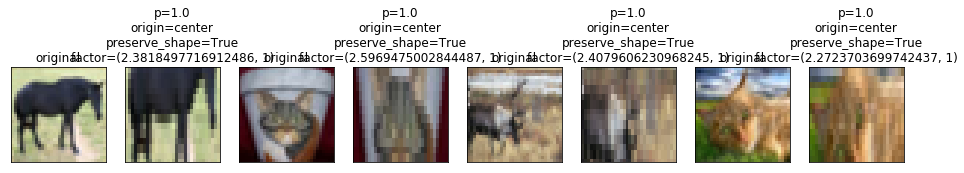

In [40]:
factor_sampler = lambda: (2+np.random.beta(5,5), 1)
plot_examples(title = '',
              action = lambda batch, **params: batch.scale(**params),
              p = [1.]*4,
              factor=[factor_sampler() for i in range(4)],
              preserve_shape=[True]*4,
              origin=['center']*4)

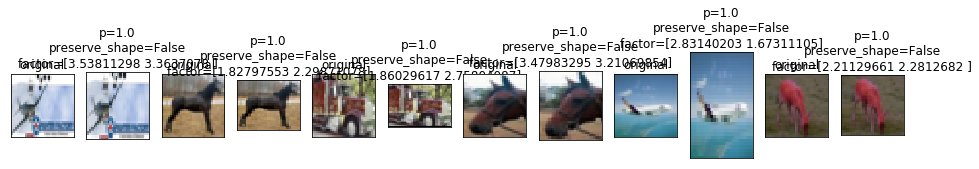

In [41]:
factor_sampler = lambda: (1+3*np.random.beta(2,2,2))
plot_examples(title = '',
              action = lambda batch, **params: batch.scale(**params),
              p = [1.]*6,
              factor=[factor_sampler() for i in range(6)],
              preserve_shape=[False]*6)

# Pad

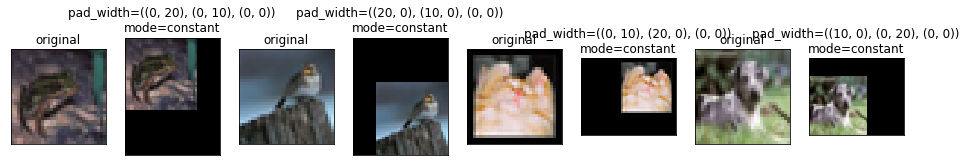

In [42]:
plot_examples(title = '',
              action = lambda batch, **params: batch.pad(**params),
              pad_width=[((0,20),(0,10),(0,0)), ((20,0),(10,0),(0,0)),
                         ((0,10),(20,0),(0,0)), ((10,0),(0,20),(0,0))],
              mode=['constant']*4)

# Affine_transform

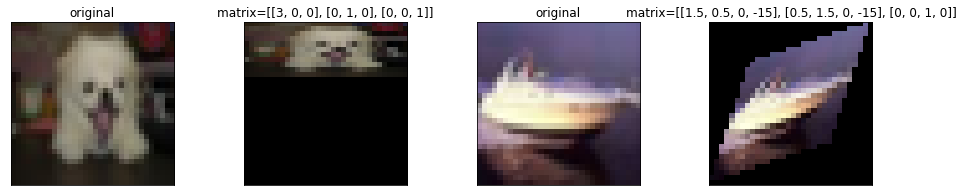

In [4]:
plot_examples(title = '',
              action = lambda batch, **params: batch.affine_transform(**params),
              matrix=[[[3,0,0],
                       [0,1,0],
                       [0,0,1]],
                      
                      [[1.5,0.5,0,-15],
                       [0.5,1.5,0,-15],
                       [0,0,1,0]]
                     ])

# Invert

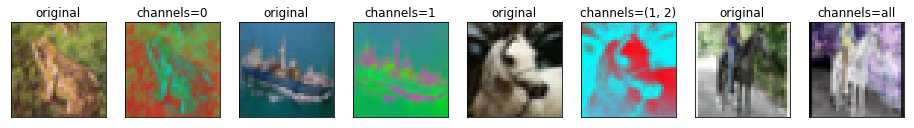

In [43]:
plot_examples(title = '',
              action = lambda batch, **params: batch.invert(**params),
              channels=[0, 1, (1, 2), 'all'])

# Threshold

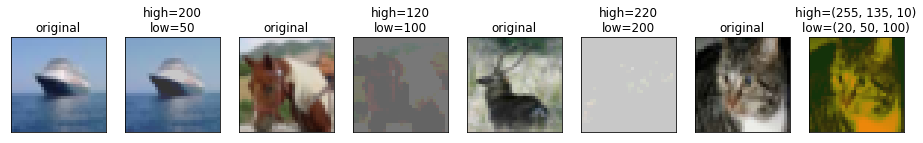

In [54]:
plot_examples(title = '',
              action = lambda batch, **params: batch.threshold(**params),
              low = [50, 100, 200] + [(20, 50, 100)],
              high = [200, 120, 220] + [(255, 135, 10)])

# Multiply

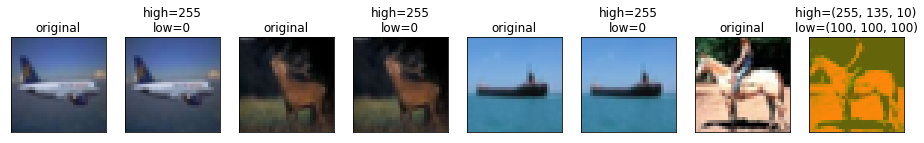

In [47]:
plot_examples(title = '',
              action = lambda batch, **params: batch.multiply(**params),
              multiplier=[2*np.random.random() for i in range(3)] + [(2,1,0.5)],
              high = [255]*3 + [(255, 135, 10)])

# Add

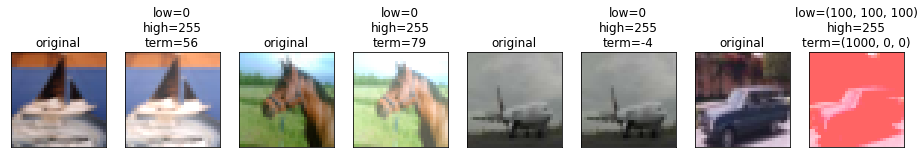

In [21]:
plot_examples(title = '',
              action = lambda batch, **params: batch.add(**params),
              term=[-100+ int(200*np.random.random()) for i in range(3)] + [(1000,0,0)],
              high = [255]*4,
              low = [0]*3 + [(100, 100, 100)])

# Salt

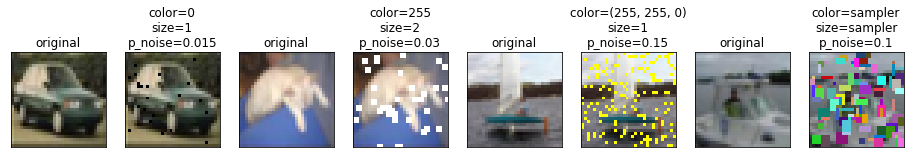

In [46]:
salt_generator=lambda: np.uint8(255*np.random.random(3))
size_generator=lambda: np.random.randint(1, 5, 2)
plot_examples(title = '',
              action = lambda batch, **params: batch.salt(**params),
              color=[0, 255, (255,255,0), salt_generator],
              p_noise=[0.015, 0.03, 0.15, 0.1],
              size=[1, 2, 1,size_generator])

# Gaussian_filter

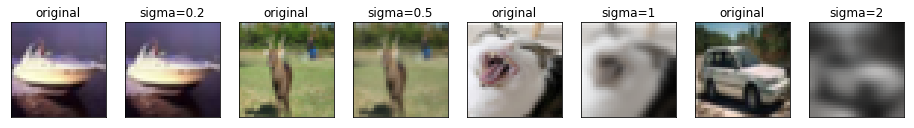

In [5]:
plot_examples(title = '',
              action = lambda batch, **params: batch.gaussian_filter(**params),
              sigma = [0.2, 0.5, 1, 2])

# Put_on_background

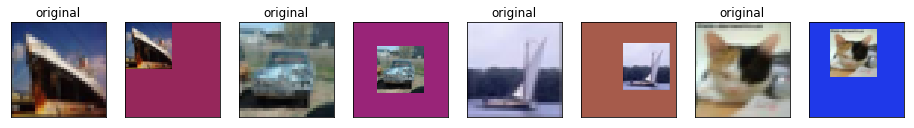

In [23]:
backgrounds = [(255*np.ones((64,64,3)) * np.random.random(3)).astype(np.uint8) for i in range(4)]
plot_examples(title = '',
              action = lambda batch, **params: batch.put_on_background(**params),
              background=backgrounds,
              origin=['top_left', 'center', 'random', 'random'],
              title_action=False)

# Pipeline example

In [24]:
def draw_batch_images(batch):
    f, a = plt.subplots(3, 6, figsize=(16, 8))
    for image, ai in zip(batch.images, a.flatten()):
        ai.imshow(image)

> Initialization and train pipelines

In [25]:
batch_size = 18
init_pipeline = (Pipeline()
         .init_variable('model_arch', ResNet18)
         .init_model('dynamic', V('model_arch'), 'model',
                     config = {'inputs' : {'images': {'shape': B('image_shape'),
                                                      'data_format': 'channels_last'},
                                           'labels': {'classes': 10,
                                                      'transform': 'ohe',
                                                      'name': 'targets'}},
                               'loss' : {'name' : 'crossentropy'},
                               'optimizer': {'name' : 'GradientDescent',
                                             'learning_rate' : 0.001},
                               'input_block/inputs' : 'images'}))

init_pipeline = init_pipeline << cifar_ds.train


train_pipeline = Pipeline().train_model('model',
                      feed_dict={'images': B('images'),
                                 'labels': B('labels')})

* By default, every element in a batch is transformed with parameters which are common for all elements in the batch (for example, angle=R('normal') first samples an angle then it rotates all images in the batch by equal angle). For example:

In [26]:
# here ``angle`` is sampled
augmentation_pipeline = Pipeline()\
                        .rotate(angle=R('normal', loc=0, scale=25))\
                        .crop(shape=(32, 32), origin='center')

pipeline = init_pipeline + augmentation_pipeline + train_pipeline

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



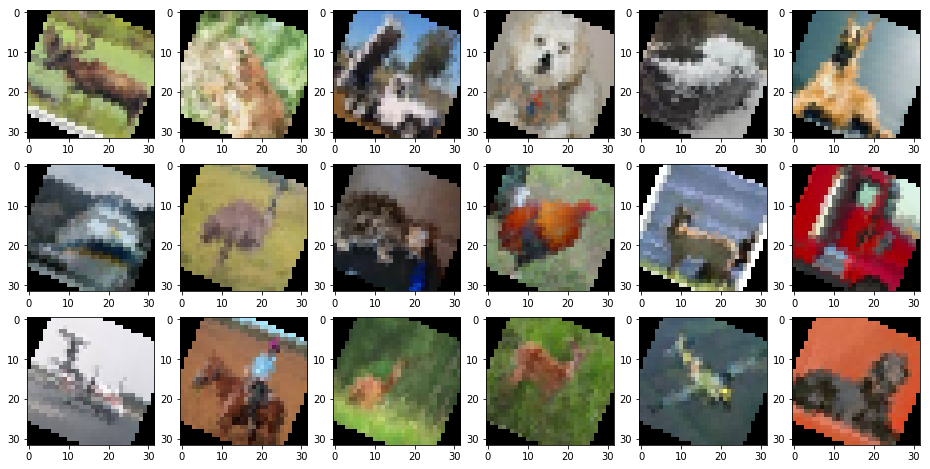

In [27]:
batch = pipeline.next_batch(batch_size=18, shuffle=True, n_epochs=None, drop_last=False)

# all images in ``batch`` are rotated by the equal angle
draw_batch_images(batch)

* To sample a parameter for every element, use ``P(R(...))`` named expression

In [28]:
# here angle is sampled for every element in a batch
# don't forget to crop images to the same size after rotation
augmentation_pipeline = Pipeline()\
                        .rotate(angle=P(R('normal', loc=0, scale=25)))\
                        .crop(shape=(32, 32), origin='center')

pipeline = init_pipeline + augmentation_pipeline + train_pipeline

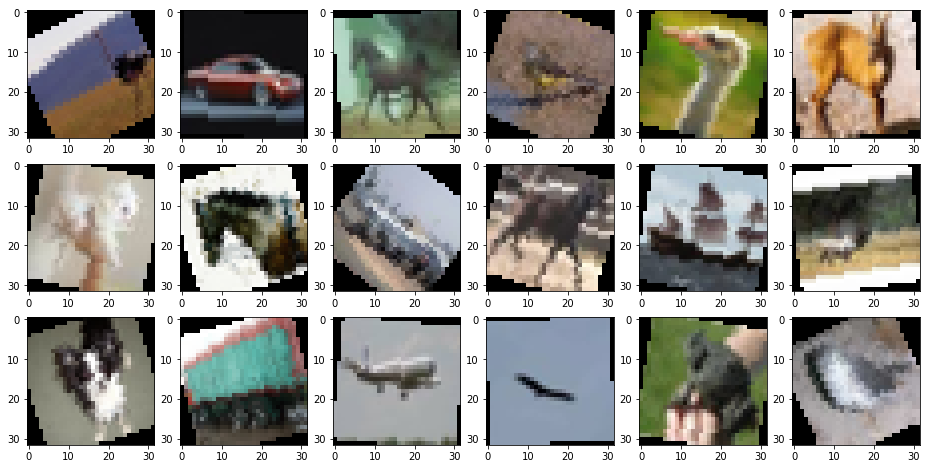

In [29]:
batch = pipeline.next_batch(batch_size=18, shuffle=True, n_epochs=None, drop_last=False)

# now angle is random for every element in ``batch``
draw_batch_images(batch)

* You can stack several actions

In [30]:
# if you use custom generator then it must have ``size`` parameter
# which determines the number of values to sample
salt_generator = lambda size=1: 255*np.random.random(size=(size,3))

augmentation_pipeline = Pipeline()\
                        .salt(color=P(R(salt_generator)),
                                          p_noise=P(R('uniform', 0.01, 0.3)), p=0.5)\
                        .rotate(angle=P(R('normal', loc=0, scale=25)), p=0.5)\
                        .crop(shape=(32, 32), origin='center')

pipeline = init_pipeline + augmentation_pipeline + train_pipeline

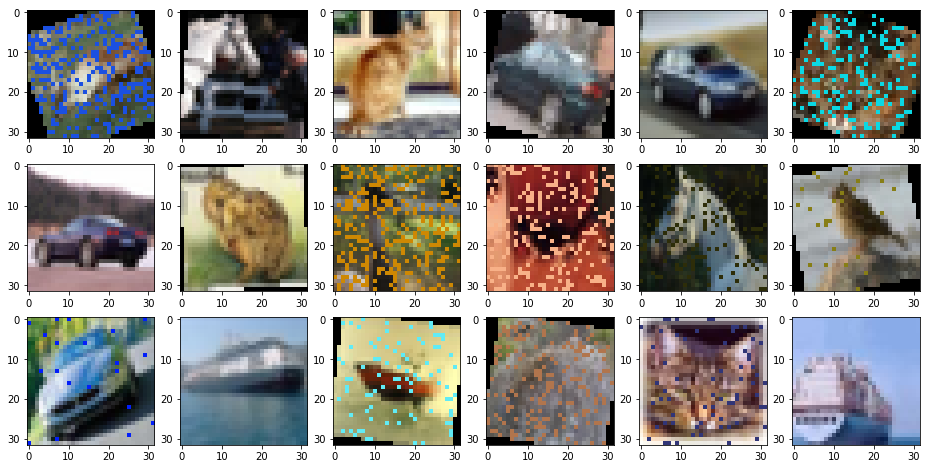

In [31]:
batch = pipeline.next_batch(batch_size=18, shuffle=True, n_epochs=None, drop_last=False)

draw_batch_images(batch)

In [11]:
import scipy.ndimage
scipy.ndimage.__dict__

{'__all__': ['absolute_import',
  'affine_transform',
  'binary_closing',
  'binary_dilation',
  'binary_erosion',
  'binary_fill_holes',
  'binary_hit_or_miss',
  'binary_opening',
  'binary_propagation',
  'black_tophat',
  'center_of_mass',
  'convolve',
  'convolve1d',
  'correlate',
  'correlate1d',
  'distance_transform_bf',
  'distance_transform_cdt',
  'distance_transform_edt',
  'division',
  'extrema',
  'filters',
  'find_objects',
  'fourier',
  'fourier_ellipsoid',
  'fourier_gaussian',
  'fourier_shift',
  'fourier_uniform',
  'gaussian_filter',
  'gaussian_filter1d',
  'gaussian_gradient_magnitude',
  'gaussian_laplace',
  'generate_binary_structure',
  'generic_filter',
  'generic_filter1d',
  'generic_gradient_magnitude',
  'generic_laplace',
  'geometric_transform',
  'grey_closing',
  'grey_dilation',
  'grey_erosion',
  'grey_opening',
  'histogram',
  'imread',
  'interpolation',
  'io',
  'iterate_structure',
  'label',
  'labeled_comprehension',
  'laplace',
  'm

In [42]:
kek = '''SciPy
Scipy.org
Docs
SciPy v1.0.0 Reference Guide
index
modules
next
previous
Multi-dimensional image processing (scipy.ndimage)
This package contains various functions for multi-dimensional image processing.

Filters
convolve(input, weights[, output, mode, ...])	Multidimensional convolution.
convolve1d(input, weights[, axis, output, ...])	Calculate a one-dimensional convolution along the given axis.
correlate(input, weights[, output, mode, ...])	Multi-dimensional correlation.
correlate1d(input, weights[, axis, output, ...])	Calculate a one-dimensional correlation along the given axis.
gaussian_filter(input, sigma[, order, ...])	Multidimensional Gaussian filter.
gaussian_filter1d(input, sigma[, axis, ...])	One-dimensional Gaussian filter.
gaussian_gradient_magnitude(input, sigma[, ...])	Multidimensional gradient magnitude using Gaussian derivatives.
gaussian_laplace(input, sigma[, output, ...])	Multidimensional Laplace filter using gaussian second derivatives.
generic_filter(input, function[, size, ...])	Calculate a multi-dimensional filter using the given function.
generic_filter1d(input, function, filter_size)	Calculate a one-dimensional filter along the given axis.
generic_gradient_magnitude(input, derivative)	Gradient magnitude using a provided gradient function.
generic_laplace(input, derivative2[, ...])	N-dimensional Laplace filter using a provided second derivative function.
laplace(input[, output, mode, cval])	N-dimensional Laplace filter based on approximate second derivatives.
maximum_filter(input[, size, footprint, ...])	Calculate a multi-dimensional maximum filter.
maximum_filter1d(input, size[, axis, ...])	Calculate a one-dimensional maximum filter along the given axis.
median_filter(input[, size, footprint, ...])	Calculate a multidimensional median filter.
minimum_filter(input[, size, footprint, ...])	Calculate a multi-dimensional minimum filter.
minimum_filter1d(input, size[, axis, ...])	Calculate a one-dimensional minimum filter along the given axis.
percentile_filter(input, percentile[, size, ...])	Calculate a multi-dimensional percentile filter.
prewitt(input[, axis, output, mode, cval])	Calculate a Prewitt filter.
rank_filter(input, rank[, size, footprint, ...])	Calculate a multi-dimensional rank filter.
sobel(input[, axis, output, mode, cval])	Calculate a Sobel filter.
uniform_filter(input[, size, output, mode, ...])	Multi-dimensional uniform filter.
uniform_filter1d(input, size[, axis, ...])	Calculate a one-dimensional uniform filter along the given axis.
Fourier filters
fourier_ellipsoid(input, size[, n, axis, output])	Multi-dimensional ellipsoid fourier filter.
fourier_gaussian(input, sigma[, n, axis, output])	Multi-dimensional Gaussian fourier filter.
fourier_shift(input, shift[, n, axis, output])	Multi-dimensional fourier shift filter.
fourier_uniform(input, size[, n, axis, output])	Multi-dimensional uniform fourier filter.
Interpolation
affine_transform(input, matrix[, offset, ...])	Apply an affine transformation.
geometric_transform(input, mapping[, ...])	Apply an arbitrary geometric transform.
map_coordinates(input, coordinates[, ...])	Map the input array to new coordinates by interpolation.
rotate(input, angle[, axes, reshape, ...])	Rotate an array.
shift(input, shift[, output, order, mode, ...])	Shift an array.
spline_filter(input[, order, output])	Multi-dimensional spline filter.
spline_filter1d(input[, order, axis, output])	Calculates a one-dimensional spline filter along the given axis.
zoom(input, zoom[, output, order, mode, ...])	Zoom an array.
Measurements
center_of_mass(input[, labels, index])	Calculate the center of mass of the values of an array at labels.
extrema(input[, labels, index])	Calculate the minimums and maximums of the values of an array at labels, along with their positions.
find_objects(input[, max_label])	Find objects in a labeled array.
histogram(input, min, max, bins[, labels, index])	Calculate the histogram of the values of an array, optionally at labels.
label(input[, structure, output])	Label features in an array.
labeled_comprehension(input, labels, index, ...)	Roughly equivalent to [func(input[labels == i]) for i in index].
maximum(input[, labels, index])	Calculate the maximum of the values of an array over labeled regions.
maximum_position(input[, labels, index])	Find the positions of the maximums of the values of an array at labels.
mean(input[, labels, index])	Calculate the mean of the values of an array at labels.
median(input[, labels, index])	Calculate the median of the values of an array over labeled regions.
minimum(input[, labels, index])	Calculate the minimum of the values of an array over labeled regions.
minimum_position(input[, labels, index])	Find the positions of the minimums of the values of an array at labels.
standard_deviation(input[, labels, index])	Calculate the standard deviation of the values of an n-D image array, optionally at specified sub-regions.
sum(input[, labels, index])	Calculate the sum of the values of the array.
variance(input[, labels, index])	Calculate the variance of the values of an n-D image array, optionally at specified sub-regions.
watershed_ift(input, markers[, structure, ...])	Apply watershed from markers using image foresting transform algorithm.
Morphology
binary_closing(input[, structure, ...])	Multi-dimensional binary closing with the given structuring element.
binary_dilation(input[, structure, ...])	Multi-dimensional binary dilation with the given structuring element.
binary_erosion(input[, structure, ...])	Multi-dimensional binary erosion with a given structuring element.
binary_fill_holes(input[, structure, ...])	Fill the holes in binary objects.
binary_hit_or_miss(input[, structure1, ...])	Multi-dimensional binary hit-or-miss transform.
binary_opening(input[, structure, ...])	Multi-dimensional binary opening with the given structuring element.
binary_propagation(input[, structure, mask, ...])	Multi-dimensional binary propagation with the given structuring element.
black_tophat(input[, size, footprint, ...])	Multi-dimensional black tophat filter.
distance_transform_bf(input[, metric, ...])	Distance transform function by a brute force algorithm.
distance_transform_cdt(input[, metric, ...])	Distance transform for chamfer type of transforms.
distance_transform_edt(input[, sampling, ...])	Exact euclidean distance transform.
generate_binary_structure(rank, connectivity)	Generate a binary structure for binary morphological operations.
grey_closing(input[, size, footprint, ...])	Multi-dimensional greyscale closing.
grey_dilation(input[, size, footprint, ...])	Calculate a greyscale dilation, using either a structuring element, or a footprint corresponding to a flat structuring element.
grey_erosion(input[, size, footprint, ...])	Calculate a greyscale erosion, using either a structuring element, or a footprint corresponding to a flat structuring element.
grey_opening(input[, size, footprint, ...])	Multi-dimensional greyscale opening.
iterate_structure(structure, iterations[, ...])	Iterate a structure by dilating it with itself.
morphological_gradient(input[, size, ...])	Multi-dimensional morphological gradient.
morphological_laplace(input[, size, ...])	Multi-dimensional morphological laplace.
white_tophat(input[, size, footprint, ...])	Multi-dimensional white tophat filter.
Utility
imread(*args, **kwds)	imread is deprecated!
Table Of Contents
Multi-dimensional image processing (scipy.ndimage)
Filters
Fourier filters
Interpolation
Measurements
Morphology
Utility
Previous topic
scipy.misc.who

Next topic
scipy.ndimage.convolve

© Copyright 2008-2016, The Scipy community.  Last updated on Oct 25, 2017. Created using Sphinx 1.5.3.'''


k = """input : ndarray"""
l = """input : array_like"""

for m in scipy.ndimage.__dict__['__all__']:
    f = getattr(scipy.ndimage, m)
    doc = getattr(f, '__doc__')
    
    if doc is not None and (k in doc or l in doc):
        print(f.__name__)
# scipy.ndimage.__dict__.keys()

affine_transform
binary_closing
binary_dilation
binary_erosion
binary_fill_holes
binary_hit_or_miss
binary_opening
binary_propagation
black_tophat
center_of_mass
convolve
convolve1d
correlate1d
distance_transform_bf
distance_transform_cdt
distance_transform_edt
extrema
find_objects
fourier_ellipsoid
fourier_gaussian
fourier_shift
fourier_uniform
gaussian_filter
gaussian_filter1d
gaussian_gradient_magnitude
gaussian_laplace
generic_filter
generic_filter1d
generic_gradient_magnitude
generic_laplace
geometric_transform
grey_closing
grey_dilation
grey_erosion
grey_opening
histogram
label
labeled_comprehension
laplace
map_coordinates
maximum
maximum_filter
maximum_filter1d
maximum_position
mean
median
median_filter
minimum
minimum_filter
minimum_filter1d
minimum_position
morphological_gradient
morphological_laplace
percentile_filter
prewitt
rank_filter
rotate
shift
sobel
spline_filter1d
standard_deviation
sum
uniform_filter
uniform_filter1d
variance
watershed_ift
white_tophat
zoom


In [34]:
# f = getattr(scipy.ndimage, m)
# print(f.__doc__)
a =getattr(f, '__doc__', 'kek')
a